## LPrec

Here is an example on how to use the log-polar based method (https://github.com/math-vrn/lprec) for reconstruction in Tomopy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Install lprec from github, then

In [2]:
import tomopy

[DXchange](http://dxchange.readthedocs.io) is installed with tomopy to provide support 
for tomographic data loading. Various data format from all major [synchrotron](http://dxchange.readthedocs.io/en/latest/source/demo.html) facilities are supported. 

In [3]:
import dxchange

matplotlib provide plotting of the result in this notebook. [Paraview](http://www.paraview.org/) or other tools are available for more sophisticated 3D rendering.

In [4]:
import matplotlib.pyplot as plt

In [5]:
fname = '../../tomopy/data/tooth.h5'

Select the sinogram range to reconstruct.

In [6]:
start = 0
end = 2

This data set file format follows the [APS](http://www.aps.anl.gov) beamline [2-BM and 32-ID](https://www1.aps.anl.gov/Imaging) definition. Other file format readers are available at [DXchange](http://dxchange.readthedocs.io/en/latest/source/api/dxchange.exchange.html).

In [7]:
proj, flat, dark, theta = dxchange.read_aps_32id(fname, sino=(start, end))

Plot the sinogram:

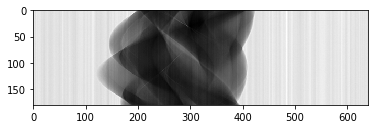

In [8]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case theta is set as equally spaced between 0-180 degrees.

In [9]:
theta = tomopy.angles(proj.shape[0])

Perform the flat-field correction of raw data: $$ \frac{proj - dark} {flat - dark} $$

In [10]:
proj = tomopy.normalize(proj, flat, dark)

Select the rotation center manually

In [11]:
rot_center = 296

Calculate $$ -log(proj) $$

In [12]:
proj = tomopy.minus_log(proj)

Reconstruction using FBP method with the log-polar coordinates

In [19]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='lpfbp', filter_name='parzen')

Mask each reconstructed slice with a circle.

In [20]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

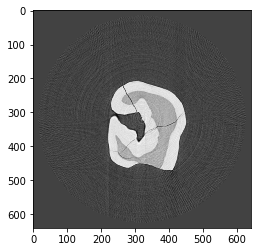

In [21]:
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the gradient descent method with the log-polar coordinates

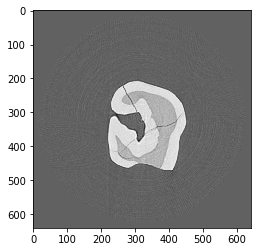

In [16]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='lpgrad', ncore=1, num_iter=64, reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the TV method with the log-polar coordinates

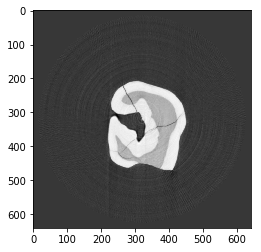

In [25]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='lptv', ncore=1, num_iter=256, reg_par=2e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the MLEM method with the log-polar coordinates

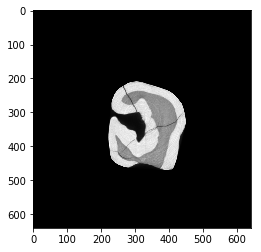

In [26]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='lpem', ncore=1, num_iter=64, reg_par=0.05)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()